# Gradient Descent: Step Sizes - Lab

## Introduction

In this lab, we'll practice applying gradient descent.  As we know gradient descent begins with an initial regression line, and moves to a "best fit" regression line by changing values of $m$ and $b$ and evaluating the RSS.  So far, we have illustrated this technique by changing the values of $b$ and evaluating the RSS.  In this lab, we will work through applying our technique by changing the value of $m$ instead.  Let's get started.

## Objectives

You will be able to:

- Understand how to go from RSS to finding a "best fit" line
- Understand how gradient descent can be used to find the best intercept for your linear regression model

## Setting up our initial regression line

Once again, we'll take take a look at revenues our data example, which looks like this:

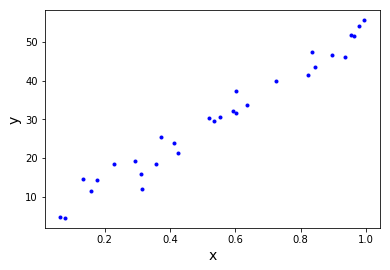

In [2]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
import matplotlib.pyplot as plt
np.random.seed(225)

x = np.random.rand(30, 1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.plot(x, y, '.b')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

We can start with some values for an initial not-so-accurate regression line, $y = 43x + 12$.

In [2]:
def regression_formula(x):
    return 12 + 43*x

In [ ]:
np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

In [4]:
def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return errors(x_values, y_values, m, b)**2

def residual_sum_squares(x_values, y_values, m, b):
    return sum(squared_errors(x_values, y_values, m, b))

Now using the `residual_sum_squares`, function, we calculate the RSS to measure the accuracy of the regression line to our data.  Let's take another look at that function:

In [ ]:
residual_sum_squares(x, y , 43, 12) 

### Building a cost curve

Now let's use the `residual_sum_squares` function to build a cost curve.  Keeping the $m$ value fixed at $43$, write a function called `rss_values`.  
* `rss_values` passes our dataset with the `x_values` and `y_values` arguments.  
* It also takes a list of values of $b$, and an initial $m$ value as arguments.  
* It outputs a numpy array with a first column of `b_values` and `rss_values`, with each key pointing to a list of the corresponding values.

In [6]:
def rss_values(x_values, y_values, m, b_values):
    pass

Now loop over a list with $b$ values between 0 and 14 with steps of 0.5. Store it in bval_RSS. Print out the resulting table.

In [ ]:
import sys
b_val = list(range(0, 15, 1))
bval_RSS = None
np.savetxt(sys.stdout, bval_RSS, '%16.2f')  #this line is to round your result, which will make things look nicer.

Plotly provides for us a table chart, and we can pass the values generated from our `rss_values` function to create a table.

And let's plot this out using a a line chart.

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(bval_RSS[:,0], bval_RSS[:,1], '-')
plt.xlabel("b-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.title("RSS with changes to intercept", fontsize=16);

## Looking at the slope of our cost curve

In this section, we'll work up to building a gradient descent function that automatically changes our step size.  To get you started, we'll provide a function called `slope_at` that calculates the slope of the cost curve at a given point on the cost curve.  `Use the slope_at` function for b-values 3 and 6.

In [ ]:
def slope_at(x_values, y_values, m, b):
    delta = .001
    base_rss = residual_sum_squares(x_values, y_values, m, b)
    delta_rss = residual_sum_squares(x_values, y_values, m, b + delta)
    numerator = delta_rss - base_rss
    slope = numerator/delta
    return {'b': b, 'slope': slope}

In [ ]:
# Use slope_at

#{'b': 3, 'slope': -232.73066022784406}

In [ ]:
# Use slope_at

{'b': 6, 'slope': -52.73066022772355}

So the `slope_at` function takes in our dataset, and returns the slope of the cost curve at that point.  So the numbers -232.73 and -52.73 reflect the slopes at the cost curve when b is 3 and 6 respectively.

In [ ]:
slope_3= slope_at(x, y, 43, 3)['slope']
slope_6 = slope_at(x, y, 43, 6)['slope']

x_3 = np.linspace(3-1, 3+1, 100)
x_6 = np.linspace(6-1, 6+1, 100)

rss_3 = residual_sum_squares(x, y, 43, 3)
rss_6 = residual_sum_squares(x, y, 43, 6)

tan_3 = rss_3+slope_3*(x_3-3)
tan_6 = rss_6+slope_6*(x_6-6)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(bval_RSS[:,0], bval_RSS[:,1], '-')
plt.plot(x_3, tan_3, color = "red",  label = "slope =" + str(round(slope_3,2)))
plt.plot(x_6, tan_6, color = "green",  label = "slope =" + str(round(slope_6,2)))

plt.xlabel("b-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.legend(loc='upper right', fontsize='large')

plt.title("RSS with changes to slope", fontsize=16);

As you can see, it seems pretty accurate.  When the curve is steeper and downwards at $b = 3$, the slope is around -232.73.  And at $b = 6$ with our cost curve becoming flatter, our slope is around -52.73. 

## Moving towards gradient descent

Now that we are familiar with our `slope_at` function and how it calculates the slope of our cost curve at a given point, we can begin to use that function with our gradient descent procedure.

Remember that gradient descent works by starting at a regression line with values m, and b, which corresponds to a point on our cost curve.  Then we alter our m or b value (here, the b value) by looking to the slope of the cost curve at that point.  Then we look to the slope of the cost curve at the new b value to indicate the size and direction of the next step.

So now let's write a function called `updated_b`.  The function will tell us the step size and direction to move along our cost curve.  The `updated_b` function takes as arguments an initial value of $b$, a learning rate, and the `slope` of the cost curve at that value of $m$.  Its return value is the next value of `b` that it calculates.

In [ ]:
def updated_b(b, learning_rate, cost_curve_slope):
    pass

This is what our function returns.

In [ ]:
current_slope = slope_at(x, y, 43, 3)['slope']
updated_b(3, .01, current_slope)
# 5.327

In [ ]:
current_slope = slope_at(x, y, 43, 5.327)['slope']
updated_b(5.327, .01, current_slope)
# 6.258

In [ ]:
current_slope = slope_at(x, y, 43, 6.258)['slope']
updated_b(6.258, .01, current_slope)
# 6.6305

In [ ]:
current_slope = slope_at(x, y, 43, 6.631)['slope']
updated_b(6.631, .01, current_slope)
# 6.780

Take a careful look at how we use the `updated_b` function.  By using our updated value of $b$ we are quickly converging towards an optimal value of $b$.   

Now let's write another function called `gradient_descent`.  The inputs of the function are `x_values`, `y_values`, `steps`, the `m` we are holding constant, the `learning_rate`, and the `current_b` that we are looking at.  The `steps` arguments represents the number of steps the function will take before the function stops.  We can get a sense of the return value in the cell below.  It is a list of dictionaries, with each dictionary having a key of the current `b` value, the `slope` of the cost curve at that `b` value, and the `rss` at that `b` value.

In [ ]:
def gradient_descent(x_values, y_values, steps, current_b, learning_rate, m):
    pass

In [ ]:
descent_steps = gradient_descent(x, y, 15, 0, learning_rate = .005, m = 43)
descent_steps

#[{'b': 0, 'rss': 1750.97, 'slope': -412.73},
# {'b': 2.063653301142949, 'rss': 1026.94, 'slope': -288.91},
# {'b': 3.5082106119386935, 'rss': 672.15, 'slope': -202.24},
# {'b': 4.519400729495828, 'rss': 498.29, 'slope': -141.57},
# {'b': 5.2272338117862205, 'rss': 413.1, 'slope': -99.1},
# {'b': 5.72271696938941, 'rss': 371.35, 'slope': -69.37},
# {'b': 6.06955517971187, 'rss': 350.88, 'slope': -48.56},
# {'b': 6.312341926937677, 'rss': 340.86, 'slope': -33.99},
# {'b': 6.482292649996282, 'rss': 335.94, 'slope': -23.79},
# {'b': 6.601258156136964, 'rss': 333.53, 'slope': -16.66},
# {'b': 6.684534010435641, 'rss': 332.35, 'slope': -11.66},
# {'b': 6.742827108444089, 'rss': 331.77, 'slope': -8.16},
# {'b': 6.7836322770506285, 'rss': 331.49, 'slope': -5.71},
# {'b': 6.812195895074922, 'rss': 331.35, 'slope': -4.0},
# {'b': 6.832190427692808, 'rss': 331.28, 'slope': -2.8}]

Looking at our b-values, you get a pretty good idea of how our gradient descent function works.  It starts far away with $b = 0$, and the step size is relatively large, as is the slope of the cost curve.  As the $b$ value updates such that it approaches a minimum of the RSS, the slope of the cost curve and the size of each step both decrease.     

Remember that each of these steps indicates a change in our regression line's slope value towards a "fit" that more accurately matches our dataset.  Let's plot the final regression line as found before, with $m=43$ and $b=6.83$

In [ ]:
# plot the final result here

As you can see, this final intercept value of around $b=6.8$ better matches our data. Remember that the slope was kept constant. You can see that lifting the slope upwards could probably even lead to a better fit!

## Summary

In this lesson, we learned some more about gradient descent.  We saw how gradient descent allows our function to improve to a regression line that better matches our data.  We see how to change our regression line, by looking at the Residual Sum of Squares related to current regression line. We update our regression line by looking at the rate of change of our RSS as we adjust our regression line in the right direction -- that is, the slope of our cost curve.  The larger the magnitude of our rate of change (or slope of our cost curve) the larger our step size.  This way, we take larger steps the further away we are from our minimizing our RSS, and take smaller steps as we converge towards our minimum RSS. 